In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df1 = pd.read_csv('kijiji_toronto_apartments_300.csv')
df2 = pd.read_csv('kijiji_toronto_apartments_new.csv')
df = pd.concat([df1, df2])

In [3]:
df.head()

,title,price,description,date_posted,address,url
0,Private office space for 3 persons in Liberty ...,Please Contact,DescriptionProductive workspace for three that...,2023-04-03 13:02:10,"3601 Highway 7, Suite 400, Toronto, ON, L3R 0M3",https://www.kijiji.ca/v-commercial-office-spac...
1,Room available for female Markham rd and paint...,$675,DescriptionPrivate room available for rent for...,2023-04-03 10:24:53,"23 Bailey Cres, Toronto, M1G 2P4",https://www.kijiji.ca/v-room-rental-roommate/c...
2,Looking for a lease!?!,"$2,500",DescriptionStunning 2 Bedroom Corner Unit In A...,2023-04-02 23:36:57,"20 Orchid Place Drive, Scarborough, Toronto, ON",https://www.kijiji.ca/v-apartments-condos/city...
3,Shared Accommodation for boys,$420,DescriptionAccommodation available for 3 Malay...,2023-04-02 23:32:49,"Lawrence Ave E, Toronto, ON, M1R 2Z1",https://www.kijiji.ca/v-short-term-rental/city...
4,Sharing accommodation for girls and boys India...,$550,Descriptionaccomodation available for girls an...,2023-04-02 22:29:09,"20 Tuxedo Ct, Scarborough, ON M1G 3S5, Canada",https://www.kijiji.ca/v-room-rental-roommate/c...


In [4]:
df['description'] = df['description'].str.replace('Description', '')
df.head()

,title,price,description,date_posted,address,url
0,Private office space for 3 persons in Liberty ...,Please Contact,Productive workspace for three that comes with...,2023-04-03 13:02:10,"3601 Highway 7, Suite 400, Toronto, ON, L3R 0M3",https://www.kijiji.ca/v-commercial-office-spac...
1,Room available for female Markham rd and paint...,$675,Private room available for rent for a female\n...,2023-04-03 10:24:53,"23 Bailey Cres, Toronto, M1G 2P4",https://www.kijiji.ca/v-room-rental-roommate/c...
2,Looking for a lease!?!,"$2,500",Stunning 2 Bedroom Corner Unit In A Less Than ...,2023-04-02 23:36:57,"20 Orchid Place Drive, Scarborough, Toronto, ON",https://www.kijiji.ca/v-apartments-condos/city...
3,Shared Accommodation for boys,$420,Accommodation available for 3 Malayali boys.\n...,2023-04-02 23:32:49,"Lawrence Ave E, Toronto, ON, M1R 2Z1",https://www.kijiji.ca/v-short-term-rental/city...
4,Sharing accommodation for girls and boys India...,$550,accomodation available for girls and boys\n(Pr...,2023-04-02 22:29:09,"20 Tuxedo Ct, Scarborough, ON M1G 3S5, Canada",https://www.kijiji.ca/v-room-rental-roommate/c...


In [5]:
df.drop_duplicates(subset='url', inplace=True)

In [6]:
print(df['price'].value_counts())

Please Contact    76
$2,500            20
$1,200            17
$900              16
$750              12
                  ..
$2,097             1
$3,050             1
$1,125             1
$2,450             1
$1,175             1
Name: price, Length: 245, dtype: int64


In [7]:
df.shape

(643, 6)

In [8]:
price_regex = r'^\$?([\d,]+)(?:\.(\d{2}))?$'

# Define function to extract numeric value from price string
def extract_numeric_value(price_str):
    match = re.match(price_regex, price_str)
    if match:
        return float(match.group(1).replace(',', '') + '.' + (match.group(2) if match.group(2) else '00'))
    else:
        return None

In [9]:
df['price'] = df['price'].astype(str)

In [10]:
df['price'] = df['price'].apply(extract_numeric_value)

In [11]:
print(df['price'].value_counts())

2500.0    20
1200.0    17
900.0     16
650.0     12
750.0     12
          ..
2186.0     1
2097.0     1
3050.0     1
2450.0     1
1175.0     1
Name: price, Length: 233, dtype: int64


In [12]:
df.isnull().sum()

title            5
price          105
description      5
date_posted     61
address          5
url              0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

title          0
price          0
description    0
date_posted    0
address        0
url            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x13685fdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1369003a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13685faf0>],
 'medians': [<matplotlib.lines.Line2D at 0x136900940>],
 'fliers': [<matplotlib.lines.Line2D at 0x136900c10>],
 'means': []}

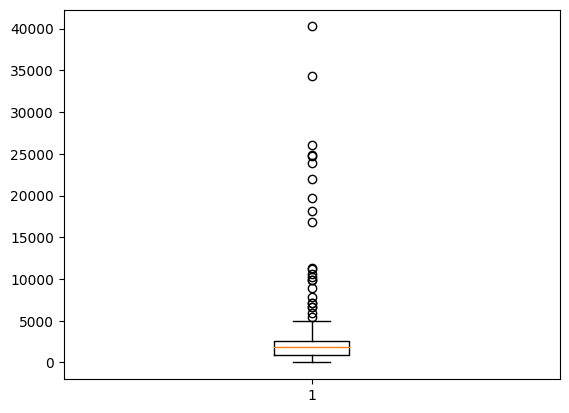

In [15]:
plt.boxplot(df['price'])

In [16]:
df.describe()

,price
count,488.000000
mean,2457.932377
std,3739.600829
min,1.000000
25%,900.000000
50%,1913.500000
75%,2625.000000
max,40250.000000


In [17]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers from the DataFrame
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x136a01520>,
 'caps': [<matplotlib.lines.Line2D at 0x136a01ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x136a012b0>],
 'medians': [<matplotlib.lines.Line2D at 0x136a100a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x136a10370>],
 'means': []}

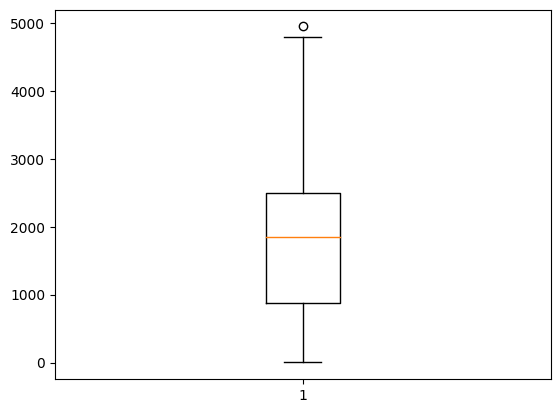

In [18]:
plt.boxplot(df['price'])

In [19]:
df.shape

(464, 6)

In [20]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['month'] = df['date_posted'].dt.month

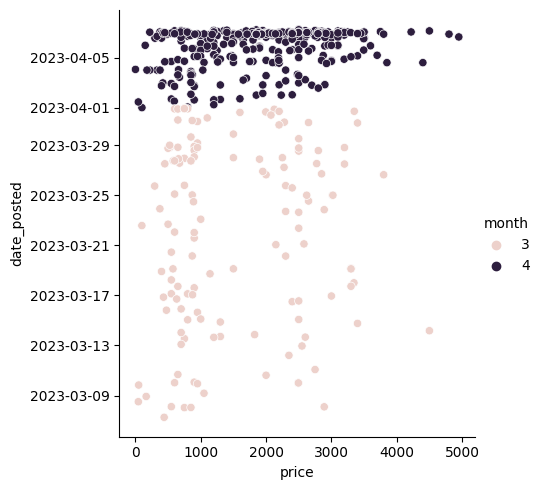

In [21]:
sns.relplot(y='date_posted', x='price', hue='month', kind='scatter', data=df)

In [22]:
# Extract city name from address column
def extract_city(address):
    cities = ['brampton', 'mississauga', 'don mills', 'toronto', 'ajax', 'markham', 'scarborough', 'north york']
    for city in cities:
        if city in address.lower():
            return city
    return 'Other'

In [23]:
df['city'] = df['address'].apply(extract_city)

In [24]:
df.head()

,title,price,description,date_posted,address,url,month,city
1,Room available for female Markham rd and paint...,675.0,Private room available for rent for a female\n...,2023-04-03 10:24:53,"23 Bailey Cres, Toronto, M1G 2P4",https://www.kijiji.ca/v-room-rental-roommate/c...,4,toronto
2,Looking for a lease!?!,2500.0,Stunning 2 Bedroom Corner Unit In A Less Than ...,2023-04-02 23:36:57,"20 Orchid Place Drive, Scarborough, Toronto, ON",https://www.kijiji.ca/v-apartments-condos/city...,4,toronto
3,Shared Accommodation for boys,420.0,Accommodation available for 3 Malayali boys.\n...,2023-04-02 23:32:49,"Lawrence Ave E, Toronto, ON, M1R 2Z1",https://www.kijiji.ca/v-short-term-rental/city...,4,toronto
4,Sharing accommodation for girls and boys India...,550.0,accomodation available for girls and boys\n(Pr...,2023-04-02 22:29:09,"20 Tuxedo Ct, Scarborough, ON M1G 3S5, Canada",https://www.kijiji.ca/v-room-rental-roommate/c...,4,scarborough
5,3 Beds 2 Baths House Prime Location Richmond H...,2900.0,I am renting my house in one of the best neigh...,2023-04-02 20:16:52,"Richmond Hill, ON L4C 7N6",https://www.kijiji.ca/v-apartments-condos/city...,4,Other


In [25]:
grouped = df.groupby('city')
for name, group in grouped:
    print(f"{name}: {len(group)}")

Other: 38
brampton: 6
don mills: 17
markham: 18
mississauga: 4
north york: 141
scarborough: 84
toronto: 156


[Text(0, 0, 'toronto'),
 Text(1, 0, 'scarborough'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'markham'),
 Text(4, 0, 'north york'),
 Text(5, 0, 'don mills'),
 Text(6, 0, 'brampton'),
 Text(7, 0, 'mississauga')]

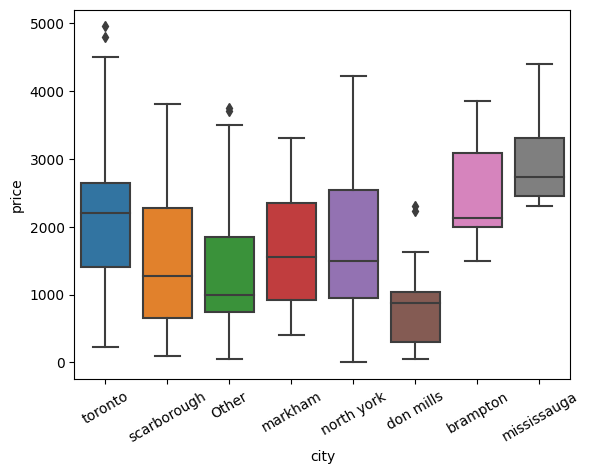

In [26]:
ax = sns.boxplot(x='city', y='price', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

<AxesSubplot:>

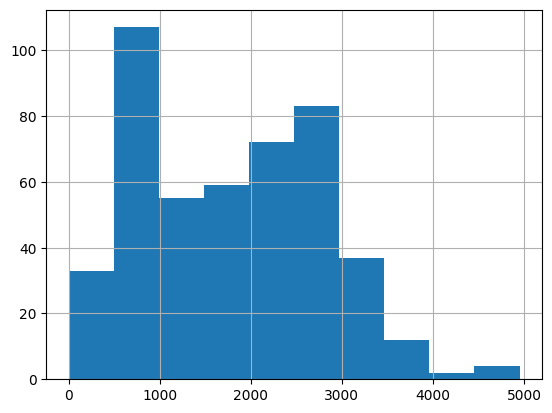

In [27]:
df['price'].hist()

<AxesSubplot:xlabel='price', ylabel='Count'>

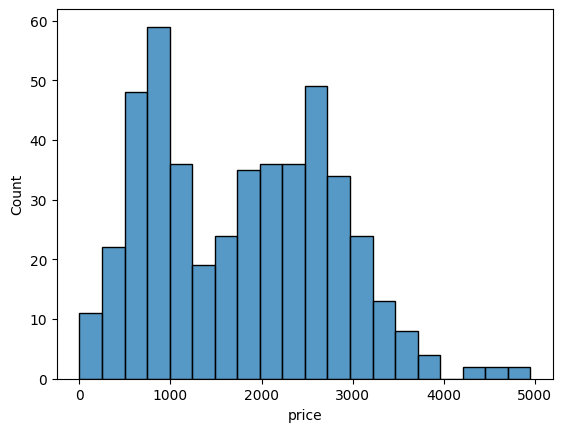

In [28]:
sns.histplot(data=df, x='price', bins=20)

In [37]:
# pattern detecting male and female
pattern = re.compile(r'\b(male|female|m|f|man|woman)\b', flags=re.IGNORECASE)

# Apply the pattern
df['gender'] = df['description'].str.extract(pattern, expand=False)

gender_map = {
    'male': 'male',
    'Male': 'male',
    'MALE': 'male',
    'm': 'male',
    'man': 'male',
    'female': 'female',
    'Female': 'female',
    'FEMALE': 'female',
    'f': 'female',
    'woman': 'female'
}
# Group using gender
df['gender'] = df['gender'].map(gender_map)
counts = df['gender'].value_counts()

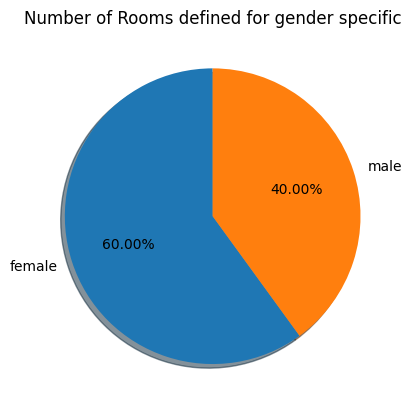

In [40]:
plt.pie(counts.values, labels=counts.index, autopct="%0.2f%%", startangle=90, shadow=True)
plt.title('Number of Rooms defined for gender specific')
plt.show()